In [20]:
import pyforest as pf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,RFE,RFECV,SelectKBest
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('diabetes.csv')
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
def get_confusionandscore(model,x,y):
    print(f'{confusion_matrix(y,model.predict(x))}')
    print(f'Accuracy Score is:{accuracy_score(y,model.predict(x))}')
    print(f'f1_score is:{f1_score(y,model.predict(x))}')

In [23]:
#lets add some new features
df['Pregnanciessquare']=np.square(df['Pregnancies'])
df['Glucosesquare']=np.square(df['Glucose'])
df['BloodPressuresqrt']=np.sqrt(df['BloodPressure'])
df['InsulinBmi']=df['Insulin']*df['BMI']
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnanciessquare,Glucosesquare,BloodPressuresqrt,InsulinBmi
0,6,148,72,35,0,33.6,0.627,50,1,36,21904,8.485281,0.0
1,1,85,66,29,0,26.6,0.351,31,0,1,7225,8.124038,0.0
2,8,183,64,0,0,23.3,0.672,32,1,64,33489,8.000000,0.0
3,1,89,66,23,94,28.1,0.167,21,0,1,7921,8.124038,2641.4
4,0,137,40,35,168,43.1,2.288,33,1,0,18769,6.324555,7240.8


In [24]:
df.shape

(768, 13)

In [25]:
numeric=[feature for feature in df.columns if df[feature].dtypes!='O']
len(numeric)

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

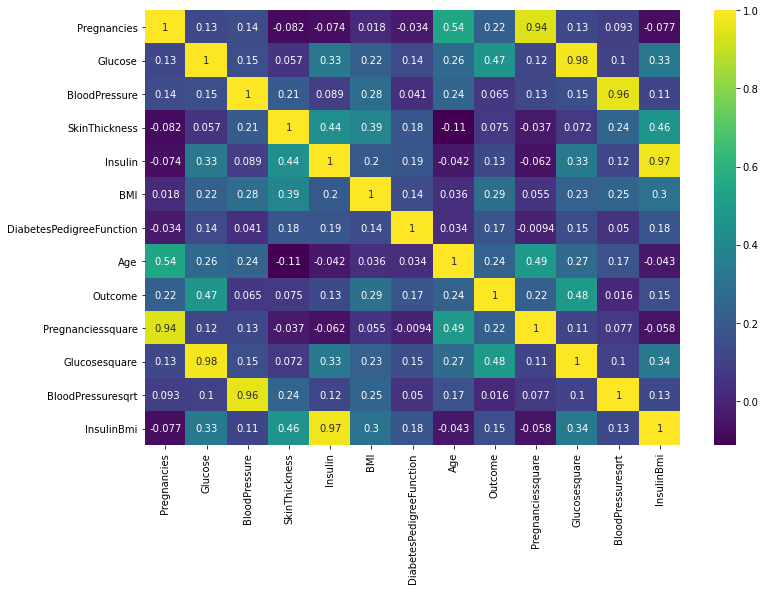

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [17]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf_logistic=LogisticRegression()
clf_logistic.fit(x_train,y_train)


<IPython.core.display.Javascript object>

LogisticRegression()

In [27]:
get_confusionandscore(clf_logistic,x_train,y_train)

[[345  45]
 [ 99 125]]
Accuracy Score is:0.7654723127035831
f1_score is:0.6345177664974619


In [29]:
get_confusionandscore(clf_logistic,x_test,y_test)

[[98 12]
 [28 16]]
Accuracy Score is:0.7402597402597403
f1_score is:0.4444444444444444


In [34]:
select_feature=SelectKBest(chi2,k=5).fit(x_train,y_train)
select_feature.scores_

array([9.75749733e+01, 1.13915703e+03, 9.68217478e+00, 6.65992436e+01,
       2.06433415e+03, 1.19221260e+02, 7.51268686e+00, 1.38882992e+02,
       1.92749529e+03, 6.17212954e+05, 6.89598606e-04, 1.10190245e+05])

In [44]:
select_features_df=pd.DataFrame({'features':x_train.columns,
                                'scores':select_feature.scores_})
select_features_df.sort_values('scores',ascending=False)

<IPython.core.display.Javascript object>

,features,scores
9,Glucosesquare,617212.953631
11,InsulinBmi,110190.245475
4,Insulin,2064.334149
8,Pregnanciessquare,1927.495290
1,Glucose,1139.157026
7,Age,138.882992
5,BMI,119.221260
0,Pregnancies,97.574973
3,SkinThickness,66.599244
2,BloodPressure,9.682175


In [49]:
chi_x_train=select_feature.transform(x_train)
chi_x_test=select_feature.transform(x_test)
lr_chi_model=clf_logistic.fit(chi_x_train,y_train)

In [50]:
get_confusionandscore(lr_chi_model,chi_x_test,y_test)

[[98 12]
 [29 15]]
Accuracy Score is:0.7337662337662337
f1_score is:0.4225352112676057


In [53]:
rfe=RFE(estimator=clf_logistic,step=1)

In [54]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression())

In [60]:
ranking_rfe=pd.DataFrame({'feature':x_train.columns,
                         'ranking':rfe.ranking_})
ranking_rfe.sort_values('ranking')

<IPython.core.display.Javascript object>

,feature,ranking
1,Glucose,1
2,BloodPressure,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
10,BloodPressuresqrt,1
8,Pregnanciessquare,2
9,Glucosesquare,3
3,SkinThickness,4
4,Insulin,5


In [76]:
x_train.shape

(614, 12)

In [78]:
y_train.shape

(614,)

In [80]:
rfe_train=rfe.transform(x_train)
rfe_test=rfe.transform(x_test)
rfe_logistic=clf_logistic.fit(rfe_train,y_train)
get_confusionandscore(rfe_logistic,rfe_test,y_test)

[[95 15]
 [23 21]]
Accuracy Score is:0.7532467532467533
f1_score is:0.5250000000000001


In [86]:
rfecv=RFECV(estimator=clf_logistic,cv=5,step=1)
rfecv.fit(x_train,y_train)
rank=rfecv.ranking_
rank_rfecv=pd.DataFrame({'features':x_train.columns,
                        'scores':rank})
rank_rfecv.sort_values('scores')

<IPython.core.display.Javascript object>

,features,scores
1,Glucose,1
2,BloodPressure,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
10,BloodPressuresqrt,1
8,Pregnanciessquare,2
9,Glucosesquare,3
3,SkinThickness,4
4,Insulin,5


In [89]:
rfecv.grid_scores_

array([0.65639078, 0.69216313, 0.68403305, 0.69698787, 0.75405838,
       0.7784886 , 0.77523657, 0.77199787, 0.75244569, 0.73771825,
       0.76218846, 0.76218846])

In [95]:
x_train.columns[rfecv.support_]

Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'BloodPressuresqrt'],
      dtype='object')

In [88]:
rfecv_x_train=rfecv.transform(x_train)
rfecv_x_test=rfecv.transform(x_test)
rfecv_log=clf_logistic.fit(rfecv_x_train,y_train)
get_confusionandscore(rfecv_log,rfecv_x_test,y_test)

[[95 15]
 [23 21]]
Accuracy Score is:0.7532467532467533
f1_score is:0.5250000000000001
